In [1]:
%load_ext autoreload
%autoreload 2
from fun import *
os.environ['QT_QPA_PLATFORM']='offscreen'

### AKAP5 

In [2]:
ref = 'Homo_sapiens_akap5'

In [3]:
# Multiple Sequence Alignment using MUSCLE
seq_filename = 'data/akap5_seq.fa'
msa_filename = 'data/msa/akap5_seq_align.fa'
# subprocess.call(["muscle","-align", seq_filename, "--output", msa_filename], 
#                 stdout=subprocess.DEVNULL,
#                 stderr=subprocess.STDOUT)

In [4]:
# Parse msa
akap5_seqs = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open(seq_filename),'fasta')}
akap5_msa_seqs = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open(msa_filename),'fasta')}
_,_,_,host_guest_dict = akap5_species_dic()

### ToL model species:

qt.gui.icc: Unsupported ICC profile class 73636e72


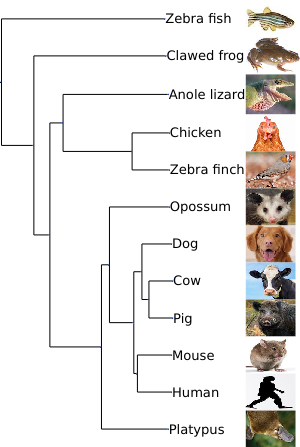

In [5]:
ts, t = show_tree_of_life_model_species('nwk_trees/model_species.nwk')
t.render("%%inline",w=300,tree_style = ts) 

### Binding partners:

#### 1. Calmodulin (CaM) - WSK domain - [Patel et al. Nature (2017)](https://www.nature.com/articles/s41467-017-01715-w)

In [6]:
base_string_wsk = 'RGAWASLKRLVTRRKRSESSKQQKPLEGEM'
compiled_regex = re.compile('(-)*'.join(list(base_string_wsk)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()

In [6]:
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs, 
                                         akap5_seqs, 
                                         start, end,
                                         'WSK')
alv.view(aln)

Canis_lupu GGAWASIKRLVTRRKRSES-SK-QQKLFEAKV
Anolis_car GGAWLAFKRLVTSRRRSKSVLKKQQQSGGSRV
Sus_scrofa GGAWVSVKRLITCRKRSDS-SK-QQKPCKAKV
Homo_sapie RGAWASLKRLVTRRKRSES-SK-QQKPLEGEM
Gallus_gal RGAWAALKSLTKPRRGQKSSSR-KKVSSDSQV
Mus_muscul AGAWASIKGLVTHRKRSEP-AK-KQKPPEAEV
Bos_taurus GGAWDSIKRLVTRRKRSES-SK-QQKPFKAKL
Taeniopygi KGTWAAIKSLARPQRRQKSSSR-KKVPSDSQV
Ornithorhy QGAWAAIKHLVPHRKRSSSSSK-KQRCSEATE
Xenopus_tr GKTWATFKRLVTHKKKRHSSLK-QQSQMNSQN
Monodelphi GGTWASIRRLITRQKRSKS-SK-KQVPLDAKA
          0↑                 20↑


#### 2. Calcineurin (PP2B) - PIAIIT motif- [ref](http://slim.icr.ac.uk/motifs/calcineurin/index.php?page=overview#pixixt)

In [7]:
base_string_piaiit = 'MEPIAIIITDTE'
compiled_regex = re.compile('(-)*'.join(list(base_string_piaiit)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()

In [8]:
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs,
                                         akap5_seqs,
                                         start, end,
                                         'PIIT',
                                         regions_dict)
alv.view(aln)

Canis_lupu MEPIAIIITDTE
Anolis_car MPAAGIMIMITE
Sus_scrofa MEPIAIIITDTE
Homo_sapie MEPIAIIITDTE
Gallus_gal GTGVGIVITITE
Mus_muscul MEPIAIIITDTE
Bos_taurus MEPIAIIITDTE
Taeniopygi GTGVSIIITITE
Ornithorhy MEPIAIIITDTE
Xenopus_tr ------------
Monodelphi MEPIAIIVTDTE
          0↑


#### 3. PKA - RII binding domain- [Church et al. eLife (2021)](https://elifesciences.org/articles/68164)

In [9]:
base_string_rii_binding = 'LLIETASSLVKNAIQLSIEQL'
compiled_regex = re.compile('(-)*'.join(list(base_string_rii_binding)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()

In [10]:
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs,
                                         akap5_seqs,
                                         start, end,
                                         'RII_binding_1',
                                         regions_dict)
alv.view(aln)

Canis_lupu LLIETASSLVKNAIQLSIEQL
Anolis_car LLIETAASLVKAAIQSSIEQL
Sus_scrofa LLIETASSLVKNAIQLSIEQL
Homo_sapie LLIETASSLVKNAIQLSIEQL
Gallus_gal LLIETASSLVKAAIQSSIEQL
Mus_muscul LLIETASSLVKNAIELSVEQL
Bos_taurus LLIETASSLVKNAIQLSIEQL
Taeniopygi LLIETASSLVKAAIQSSIEQL
Ornithorhy LLIETASSLVKKAIQLSVEQL
Xenopus_tr LLITTAATLVKKVLQASIQQL
Monodelphi LLMETASSLVKNAIQLSVEQL
          0↑                 20↑


#### 3. PKC binding - [Faux et al. jbc (1997)](https://reader.elsevier.com/reader/sd/pii/S0021925818393281?token=41EEC70C8926EE5A9CD0F774A8DB46B41F4C8DD5470424CC4351BE2FFFE89CE95151AA97ACAC6FC2259E36778809C633&originRegion=us-east-1&originCreation=20220721161621)

In [11]:
base_string_pkc = 'KASMLCFKRRKKAAKALKPKAG'
compiled_regex = re.compile('(-)*'.join(list(base_string_pkc)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()

In [12]:
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs,
                                         akap5_seqs,
                                         start, end,
                                         'PKC',
                                         regions_dict)
alv.view(aln)

Canis_lupu RASVLCFKRRKKATKAMK-PKAS
Anolis_car KASVFCFKKRKKSCEKVAEKEED
Sus_scrofa KASMLCFKRRKKATKARK-PKAG
Homo_sapie KASMLCFKRRKKAAKALK-PKAG
Gallus_gal KPSMLCFKKRKKSCKKGLTTKDA
Mus_muscul KTATLCFKRRKKANKT-K-PKAG
Bos_taurus KASMLCFKRRKKAAKAMK-PKAS
Taeniopygi KPSMLCFKKRKKSGKKGLAVKDA
Ornithorhy KSSFLCFKRKKKVVKASKFSKDD
Xenopus_tr KPLKICFKKRSKALRKTSDSNDD
Monodelphi KASMICFKRRRKSVKALK-SKNC
          0↑                 20↑


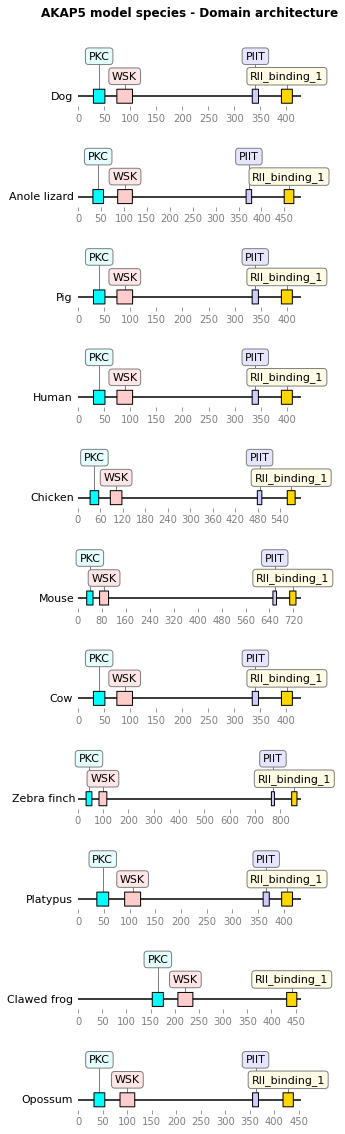

In [14]:
title = 'AKAP5 model species - Domain architecture'
visualiza_structure(host_guest_dict, colors(), regions_dict, title, akap5_seqs)

### AKAP12
### Binding partners:

In [ ]:
# #Notes:
# Is PKC in frog? what changed in the allignment from previous results?